# 4강. 훈련 세트와 테스트 세트로 나누어 사용하기

- train, test 나누기
    - 실제 데이터(100) 중에서 70~80을 훈련세트, 나머지를 20~30을 테스트세트로 사용
    - 실제 데이터가 10만개 이하라면 훈련이 제대로 이루어지지 않을 수 있다.<br>
        　-> 실무에서는 적어도 3년 이상의 데이터를 수집한 뒤 훈련/테스트/검증 진행

- 지도학습 vs 비지도학습
    - 지도학습: KNN
        - 입력, 타겟(가르침) 학습
    - 비지도학습
        - 입력, 학습
    - 강화학습
        - 계속 개선됨

# 사전준비

In [2]:
# 기본적인 패키지부터 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글/차트 마이너스 없애기
from matplotlib import rc

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

## 데이터 로드 & 분리

### 3강 데이터 로드

In [ ]:
# !pip install import-ipynb

importing Jupyter notebook from marketML.ipynb


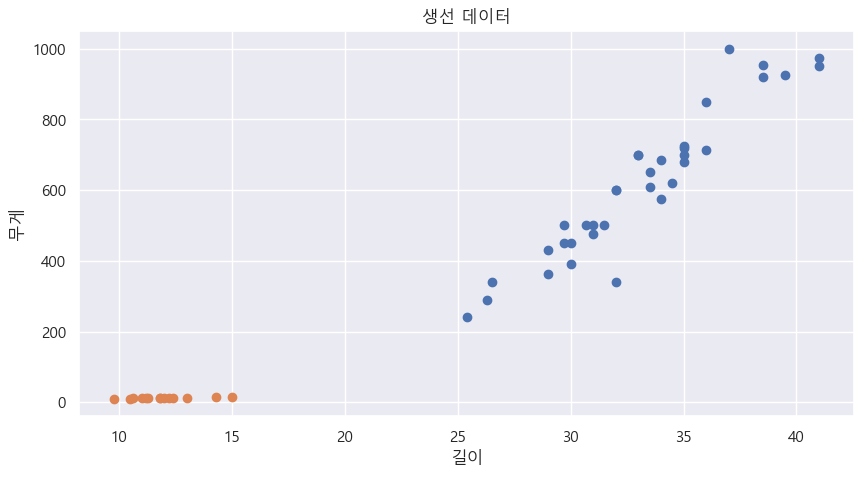

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


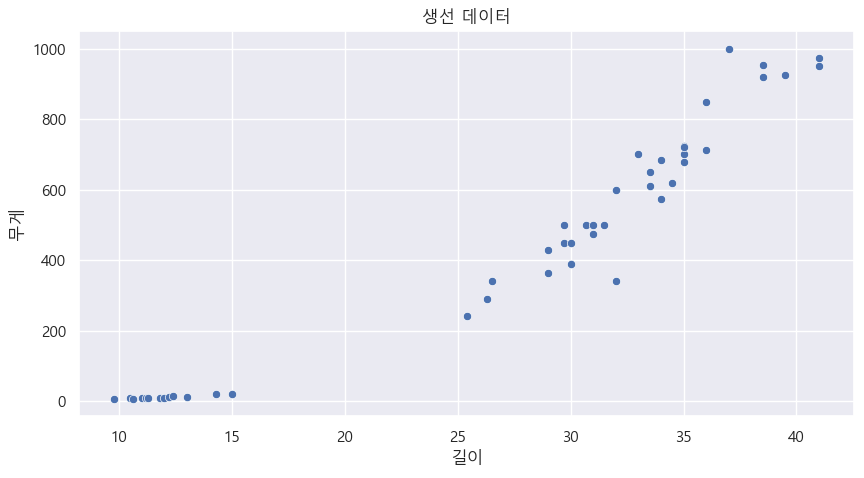

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


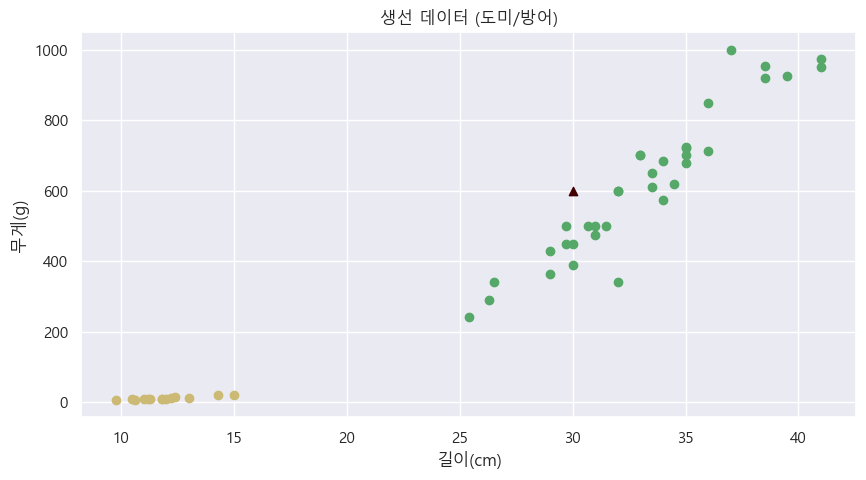

0.7142857142857143
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
import import_ipynb
from marketML import fish_data, fish_target

### 데이터 분리
- 전체 데이터를 35개 훈련세트, 14개 테스트세트로 분리

In [6]:
# 리스트 [1:3] = 리스트1부터 리스트(3-1=2)까지
# 훈련세트(0~34)
train_input = fish_data[:35]
train_target = fish_target[:35]
# 테스트세트 (35~49)
test_input = fish_data[35:]
test_target = fish_target[35:]

In [7]:
print(train_input)
print(len(train_input))

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0]]
35


In [8]:
print(test_input)
print(len(test_input))

[[9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
14


# 모델 학습

## KNN

### 평가하기

#### 테스트 세트에서 평가하기

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [10]:
kn.fit(X=train_input, y=train_target)
kn.score(X=test_input, y=test_target)
# 정확도 0.0: 샘플링 편향적(데이터를 합치기만 함)
# -> 배열 바꿔주기(numpy가 편함)

0.0

### 데이터 전처리

#### numpy 배열 준비
- numpy: scipy, matplotlib 등에서 많이 의존 함
    - 1차원배열(텐서): 벡터, 축 1개<br>
    = (리스트원소개수)차원
    - 2차원배열(텐서): 행렬, 축 2개
    - 3차원배열(텐서): 볼륨있는 구조
---
[numpy 배열](https://datascienceschool.net/01%20python/03.01%20%EB%84%98%ED%8C%8C%EC%9D%B4%20%EB%B0%B0%EC%97%B4.html)
- C: 적은 메모리로 많은 데이터를 빠르게 처리한다.
- 특징
    - 모든 원소가 같은 자료형이어야 한다.
    - 원소의 갯수를 바꿀 수 없다.

In [11]:
# numpy 배열화
input_arr = np.array(fish_data)
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [12]:
input_arr[[1]]

array([[ 26.3, 290. ]])

In [13]:
input_arr[[45]]

array([[12.4, 13.4]])

In [14]:
target_arr = np.array(fish_target)
target_arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [15]:
input_arr.shape

(49, 2)

In [16]:
target_arr.shape

(49,)

#### 데이터 섞기
![random](../img/02_04_random.png)
<p style="text-align: center">
input_arr, target_arr 함께 움직여야 한다.
</p>

1. 인덱스 49개 array로 생성하기
2. 데이터 49개 섞기
3. 훈련 35개, 테스트 14개 자르기
---
- np.arange(시작점, 끝점, 간격): 1차원 array 생성
    - 범위대로 array 숫자를 담는다. <br><br>
    - range(시작점, 끝점, 간격): 따로 담아줘야 한다.
---
- 배열 슬라이싱
    - array[[:]]
    - array[index[]]: 존재하는 array의 index를 random 해준 index값으로 뽑아낸다.

In [17]:
range = list(range(3))
range

[0, 1, 2]

In [18]:
np.random.seed(42)

index = np.arange(49)
np.random.shuffle(index)

index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [19]:
input_arr[index[1]]
# index[1] = 45
# input_arr[1]=array([[ 26.3, 290. ]]) 도미
# input_arr[45]=array([[12.4, 13.4]]) 빙어

array([12.4, 13.4])

#### 데이터 분리
![data](../img/02_04_data.png)

In [20]:
train_input = input_arr[index[0:35]]
train_target = target_arr[index[0:35]]

In [21]:
train_input

array([[  32. ,  340. ],
       [  12.4,   13.4],
       [  14.3,   19.7],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  36. ,  714. ],
       [  35. ,  720. ],
       [  35. ,  725. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  31.5,  500. ],
       [  29. ,  430. ],
       [  41. ,  950. ],
       [  30. ,  450. ],
       [  29. ,  363. ],
       [  29.7,  500. ],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  13. ,   12.2],
       [  32. ,  600. ],
       [  30.7,  500. ],
       [  33. ,  700. ],
       [  35. ,  700. ],
       [  41. ,  975. ],
       [  38.5,  920. ],
       [  25.4,  242. ],
       [  12. ,    9.8],
       [  39.5,  925. ],
       [  29.7,  450. ],
       [  37. , 1000. ],
       [  31. ,  500. ],
       [  10.5,    7.5],
       [  26.3,  290. ],
       [  34. ,  685. ],
       [  26.5,  340. ]])

In [22]:
train_target

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [23]:
test_input = input_arr[index[35:]]
test_target =target_arr[index[35:]]

In [24]:
test_input

array([[ 10.6,   7. ],
       [  9.8,   6.7],
       [ 35. , 680. ],
       [ 11.2,   9.8],
       [ 31. , 475. ],
       [ 34.5, 620. ],
       [ 33.5, 610. ],
       [ 15. ,  19.9],
       [ 34. , 575. ],
       [ 30. , 390. ],
       [ 11.8,   9.9],
       [ 32. , 600. ],
       [ 36. , 850. ],
       [ 11. ,   9.7]])

In [25]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

### 데이터 확인
- 섞은 훈련세트(blue)와 테스트세트(yellow) 확인
- 2차원 배열 확인<br>
    - array[1,0]<br>
　[[　,　],<br>
　 [V ,　]]<br>
    - array[ : ,0]<br>
　[[V ,　],<br>
　 [V ,　]]<br>
    - array[ : ,[0,1]]<br>
　[[V ,V ],<br>
　 [V ,　]]<br>

In [41]:
test_input[:,1]

array([  7. ,   6.7, 680. ,   9.8, 475. , 620. , 610. ,  19.9, 575. ,
       390. ,   9.9, 600. , 850. ,   9.7])

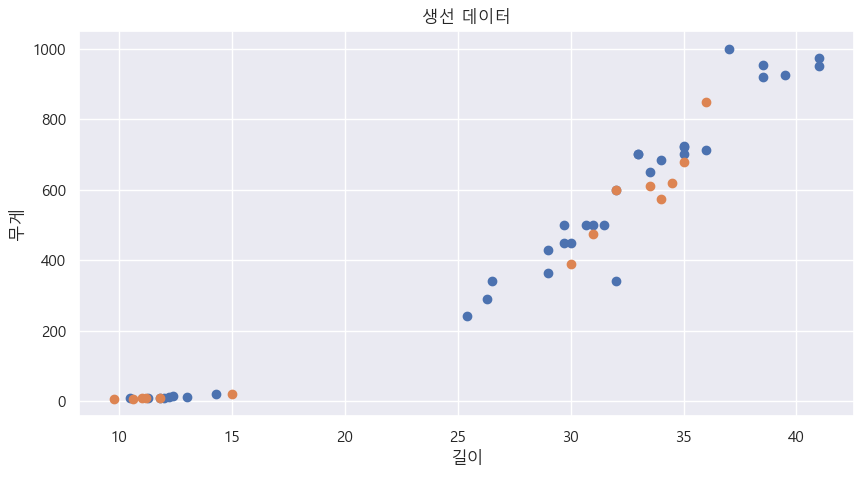

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1]) # 전체데이터에서 0번째 가져오기/1번째
plt.scatter(x=test_input[:,0], y=test_input[:,1])

plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

#### 훈련하기

In [27]:
# 훈련
kn.fit(X=train_input, y=train_target)

KNeighborsClassifier()

In [28]:
# 정확도 체크
kn.score(X=test_input, y=test_target)

1.0

In [29]:
# 예측
kn.predict(X=test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [30]:
# 실제 테스트 타겟과 예측값이랑 완전 일치 : 정확도 1.0==100
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

#### 예측하기

- 도미: 30cm, 600g
- 빙어: 10cm, 8.7g

In [31]:
pred_input = np.array([[30, 600]])
pred_input

array([[ 30, 600]])

In [32]:
kn.predict(X=pred_input)

array([1])

In [33]:
pred_input = np.array([[10.0, 8.7]])
pred_input

array([[10. ,  8.7]])

In [34]:
kn.predict(X=pred_input)

array([0])